In [1]:
# read results
import pandas as pd
genotype_p_fisher = pd.read_csv('/home/hermuba/data0118/ontologies/genotype_fisher.csv', index_col = 0)
genotype_reject_fisher = pd.read_csv('/home/hermuba/data0118/ontologies/genotype_fisher_reject.csv', index_col = 0)
genotype_odds = pd.read_csv('/home/hermuba/data0118/ontologies/genotype_fisher_odds.csv', index_col = 0)

In [2]:
# read CARD annotation, resfam
card = pd.read_csv('/home/hermuba/data0118/Escherichia0.70rm_plasmid_card.csv', index_col = 0) # loose card
resfam = pd.read_csv('/home/hermuba/data0118/resfam_anno.csv', index_col = 0)
resfam_abx = pd.read_csv('/home/hermuba/data0118/resfam_anno_abx.csv', index_col = 0)

In [168]:
# CARD data

# extract resistance based on antibiotic types
abx_spec = card.loc[card.index.isin(genotype_odds.index),card.columns.str.contains('determinant')]

def replace_col_name(s):
    return(s.replace('determinant of ','').replace(' resistance', '').replace('resistance to', ''))
abx_spec.rename(columns = replace_col_name, inplace = True)

# select only the class of abx included
abx_spec = abx_spec.loc[:, ['beta-lactam','fluoroquinolone','aminoglycoside']]

# make it categorical
x = abx_spec.stack()
abx_series = pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)), index = x[x!=0].index.get_level_values(0))


efflux_pump = card.loc[card.index.isin(genotype_odds.index), 'efflux pump complex or subunit conferring antibiotic resistance']


# color coding
import numpy as np
lut = {np.nan: 'white',
      'beta-lactam': 'red',
      'aminoglycoside': 'cyan',
      'fluoroquinolone': 'green'}

lut2 = {False: 'white',
       True: 'grey'}


# make into one dataframe
card_annotation = pd.DataFrame(index = genotype_odds.index)
card_annotation.loc[efflux_pump.index, 'efflux pump'] = efflux_pump.map(lut2)
card_annotation.loc[abx_series.index, 'antibiotic'] = abx_series.map(lut)

# fillna with white
card_annotation.fillna('white', inplace = True)

In [47]:
resfam_colormap = resfam.applymap(lambda x: lut2[x] if x != np.nan else 'white').loc[genotype_odds.index, ['ABC Transporter', 'RND Antibiotic Efflux', 'Other Efflux', 'MFS Transporter']]

/home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [48]:
resfam_abx_colormap = resfam_abx.applymap(lambda x: lut2[x] if x != np.nan else 'white').loc[genotype_odds.index]

/home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [51]:
resfam_abx.columns

Index(['rRNA Methyltransferase', 'Aminoglycoside Modifying Enzyme',
       'ABC Transporter', 'RND Antibiotic Efflux', 'Other Efflux',
       'Gene Modulating Resistance', 'Beta-Lactamase',
       'Chloramphenicol Resistance', 'MFS Transporter', 'Quinolone Resistance',
       'Other', 'Tetracycline MFS Efflux', 'Tetracycline Ribosomal Protection',
       'Tetracycline Inactivation', 'Gylcopeptide Resistance',
       'Aminoglycoside Resistance'],
      dtype='object')

In [177]:
genotype_odds.isnull().sum()

ertapenem                   69
tobramycin                  73
cefepime                    67
ampicillin                  75
meropenem                   66
amoxicillin                225
imipenem                   118
tigecycline                102
cefotaxime                   8
piperacillin-tazobactam      4
cefuroxime                  87
amoxicillin-clavunate        6
ceftazidime                  2
ciprofloxacin                3
gentamicin                   3
dtype: int64

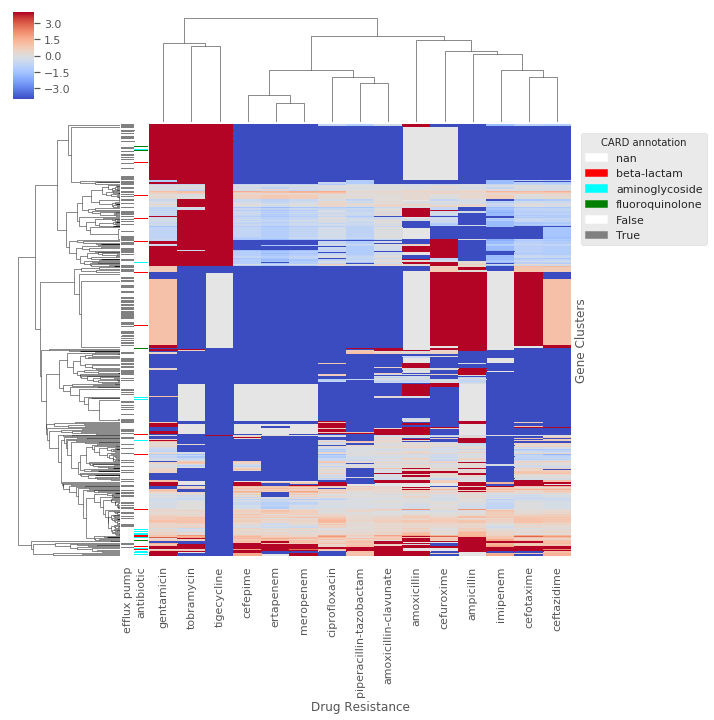

In [179]:
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
mpl.style.use("ggplot")
# plot inline
%matplotlib inline


g = sns.clustermap(genotype_odds.replace(np.inf,10000).replace(0,0.0001).fillna(1).applymap(math.log10), row_colors=card_annotation, cmap = 'coolwarm', yticklabels = False, mask = genotype_odds.isnull())

# ADDED: Remove labels.
ax = g.ax_heatmap
ax.set_xlabel("Drug Resistance")
ax.set_ylabel("Gene Clusters")

legend_card = [mpatches.Patch(color=lut[c],label=c) for c in lut.keys()]
legend_efflux = [mpatches.Patch(color=lut2[c],label=c) for c in lut2.keys()]
legend_TN = legend_card + legend_efflux
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='CARD annotation',prop={'size':10})


In [140]:
lut2.keys()

dict_keys([False, True])

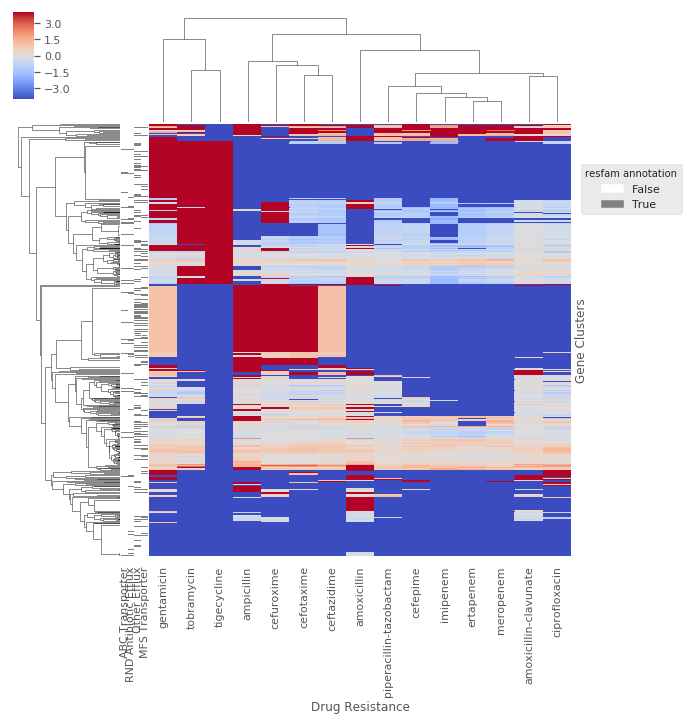

In [142]:
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
mpl.style.use("ggplot")
# plot inline
%matplotlib inline


g = sns.clustermap(genotype_odds.replace(np.inf,10000).replace(0,0.0001).fillna(0.0001).applymap(math.log10),row_colors=resfam_colormap, cmap = 'coolwarm', yticklabels = False)

# ADDED: Remove labels.
ax = g.ax_heatmap
ax.set_xlabel("Drug Resistance")
ax.set_ylabel("Gene Clusters")


# add legent
legend_TN = [mpatches.Patch(color=lut2[c],label=c) for c in lut2.keys()]
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='resfam annotation',prop={'size':10})

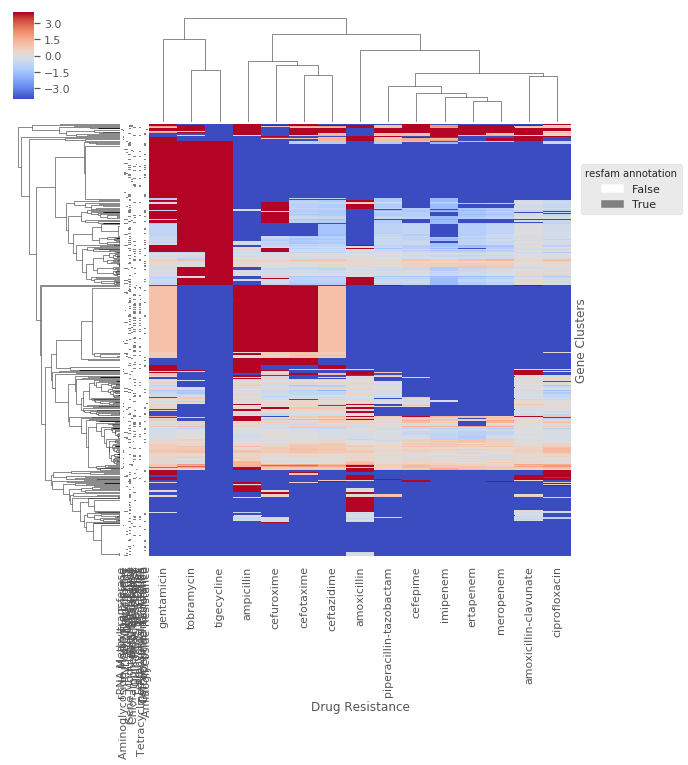

In [143]:
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
mpl.style.use("ggplot")
# plot inline
%matplotlib inline


g = sns.clustermap(genotype_odds.replace(np.inf,10000).replace(0,0.0001).fillna(0.0001).applymap(math.log10),row_colors=resfam_abx_colormap, cmap = 'coolwarm', yticklabels = False)

# ADDED: Remove labels.
ax = g.ax_heatmap
ax.set_xlabel("Drug Resistance")
ax.set_ylabel("Gene Clusters")

legend_TN = [mpatches.Patch(color=lut2[c],label=c) for c in lut2.keys()]
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='resfam annotation',prop={'size':10})

In [ ]:
g = sns.clustermap(genotype_odds.replace(np.inf,10000).replace(0,0.0001).fillna(0.0001).applymap(math.log10),row_colors=resfam_abx_colormap, cmap = 'coolwarm', yticklabels = False)

In [55]:
genotype_odds.shape # 550 genes, 15 phenotypes

(550, 15)

In [53]:
len(np.array(genotype_odds))

550

In [64]:
# return phenotype hierachial clustering
Z = g.dendrogram_row.linkage

# pick cluster
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-10:] # avg, std, count, inconsistency for each of the last 10 merges of our hierarchical clustering with depth = 5

array([[ 6.83758871,  5.0109005 , 21.        ,  1.31586074],
       [ 7.96145249,  3.9824055 , 20.        ,  1.3869214 ],
       [ 9.14957005,  4.09554795, 28.        ,  1.36627453],
       [12.04392435,  2.08675707, 16.        ,  1.58446858],
       [13.86895999,  1.0819535 ,  9.        ,  1.57852686],
       [ 9.17246786,  4.89057832, 20.        ,  1.46353655],
       [ 7.29400994,  4.90040231, 13.        ,  2.01614691],
       [ 9.97540541,  5.39505104, 16.        ,  1.45303647],
       [11.01310488,  6.48028316, 12.        ,  1.27917745],
       [11.71665772,  5.51227298, 17.        ,  1.47919888]])

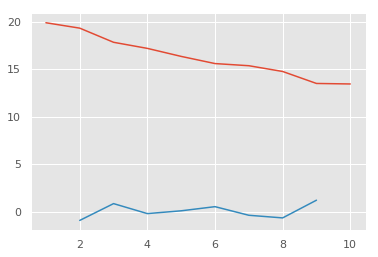

clusters: 9


In [66]:
# choose optimal depth
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [80]:
from scipy.cluster.hierarchy import fcluster
cluster = fcluster(Z, 16, criterion='maxclust') # but 9 doesn't show the one I am interested in
cluster = pd.Series(cluster, index = genotype_odds.index)

In [86]:
lut3

{9: (0.9, 0.14799999999999996, 0.09999999999999998),
 1: (0.9, 0.44799999999999995, 0.09999999999999998),
 3: (0.9, 0.7480000000000001, 0.09999999999999998),
 13: (0.7520000000000001, 0.9, 0.09999999999999998),
 4: (0.4520000000000001, 0.9, 0.09999999999999998),
 5: (0.1520000000000001, 0.9, 0.09999999999999998),
 14: (0.09999999999999998, 0.9, 0.34800000000000014),
 7: (0.09999999999999998, 0.9, 0.6480000000000001),
 6: (0.09999999999999998, 0.8519999999999998, 0.9),
 2: (0.09999999999999998, 0.5519999999999998, 0.9),
 8: (0.09999999999999998, 0.2519999999999998, 0.9),
 10: (0.24799999999999967, 0.09999999999999998, 0.9),
 11: (0.5479999999999997, 0.09999999999999998, 0.9),
 12: (0.8479999999999998, 0.09999999999999998, 0.9),
 15: (0.9, 0.09999999999999998, 0.6519999999999995),
 16: (0.9, 0.09999999999999998, 0.3519999999999994)}

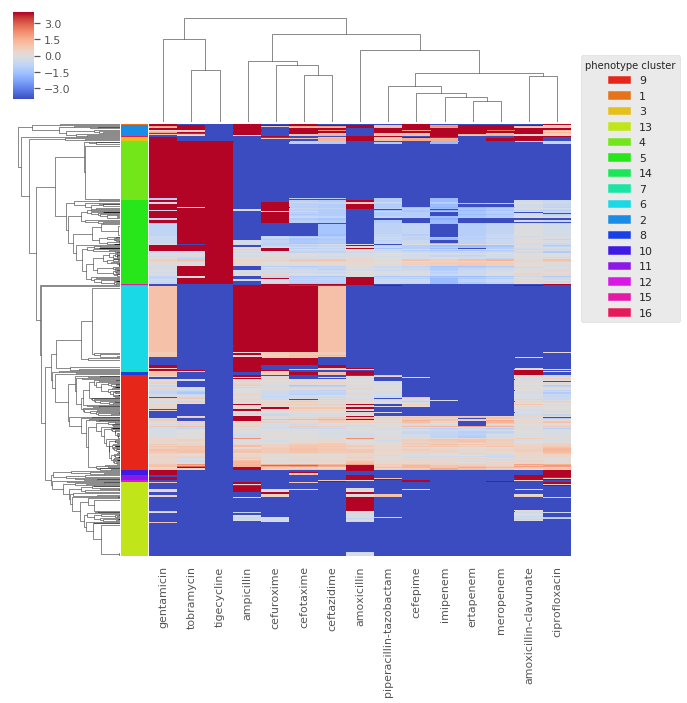

In [97]:
lut3 = dict(zip(cluster.unique(), sns.hls_palette(len(cluster.unique()), l=0.5, s=0.8)))
row_colors = cluster.map(lut3)
g = sns.clustermap(genotype_odds.replace(np.inf,10000).replace(0,0.0001).fillna(0.0001).applymap(math.log10), cmap = 'coolwarm', row_colors=row_colors, yticklabels = False)

# set legend

import matplotlib.patches as mpatches
legend_TN = [mpatches.Patch(color=lut3[c],label=c) for c in lut3.keys()]
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='phenotype cluster',prop={'size':10})

In [94]:
import matplotlib.patches as mpatches


In [83]:
cluster.to_csv('/home/hermuba/data0118/ontologies/phenotype_cluster.csv')

/home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
